<a href="https://colab.research.google.com/github/kaiky-ferreira/PerceptronAspirador/blob/main/AspiradorDePo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Resultados:
Piso=2 Poeira=2 Obst=0 -> Velocidade=3.72, Potência=1.04
Piso=1 Poeira=8 Obst=2 -> Velocidade=1.22, Potência=2.98
Piso=3 Poeira=5 Obst=4 -> Velocidade=2.10, Potência=2.27
Piso=2 Poeira=1 Obst=1 -> Velocidade=3.77, Potência=1.02
Piso=1 Poeira=9 Obst=3 -> Velocidade=1.11, Potência=3.00
Piso=3 Poeira=6 Obst=0 -> Velocidade=2.92, Potência=2.05
Piso=2 Poeira=3 Obst=2 -> Velocidade=2.74, Potência=1.24
Piso=1 Poeira=7 Obst=1 -> Velocidade=1.42, Potência=2.91
Piso=3 Poeira=4 Obst=3 -> Velocidade=2.73, Potência=1.52
Piso=2 Poeira=0 Obst=0 -> Velocidade=4.28, Potência=1.00


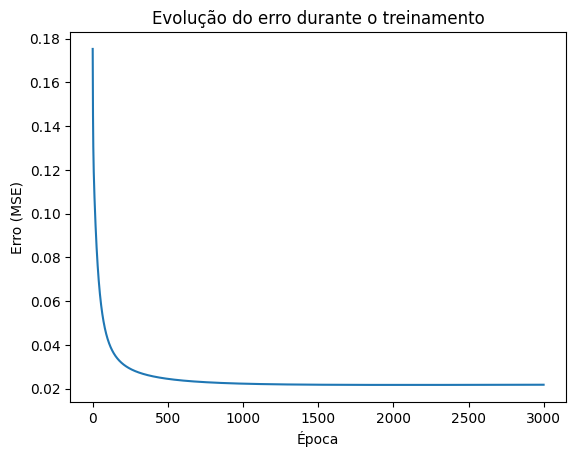

In [1]:
import numpy as np
import matplotlib.pyplot as plt


dados_treino = [
    {"piso": 2, "poeira": 2, "obstaculos": 0, "potencia": 1, "velocidade": 3},
    {"piso": 1, "poeira": 8, "obstaculos": 2, "potencia": 3, "velocidade": 1},
    {"piso": 3, "poeira": 5, "obstaculos": 4, "potencia": 2, "velocidade": 1},
    {"piso": 2, "poeira": 1, "obstaculos": 1, "potencia": 1, "velocidade": 4},
    {"piso": 1, "poeira": 9, "obstaculos": 3, "potencia": 3, "velocidade": 2},
    {"piso": 3, "poeira": 6, "obstaculos": 0, "potencia": 2, "velocidade": 3},
    {"piso": 2, "poeira": 3, "obstaculos": 2, "potencia": 1, "velocidade": 2},
    {"piso": 1, "poeira": 7, "obstaculos": 1, "potencia": 3, "velocidade": 1},
    {"piso": 3, "poeira": 4, "obstaculos": 3, "potencia": 2, "velocidade": 4},
    {"piso": 2, "poeira": 0, "obstaculos": 0, "potencia": 1, "velocidade": 5}
]


def preparar_dados(dados):
    X, Y = [], []
    for d in dados:
        piso = d["piso"]
        poeira = d["poeira"]
        obst = d["obstaculos"]
        X.append([piso, poeira, obst])
        Y.append([d["velocidade"], d["potencia"]])
    return np.array(X, dtype=float), np.array(Y, dtype=float)

X, Y = preparar_dados(dados_treino)


X[:,0] = X[:,0] / 3.0      # piso (1–3) → [0,1]
X[:,1] = X[:,1] / 10.0     # poeira (0–10) → [0,1]
X[:,2] = X[:,2] / 5.0      # obstáculos (0–5) → [0,1]


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


class Perceptron:
    def __init__(self, n_features, n_outputs, lr=0.1, epochs=2000):
        self.lr = lr
        self.epochs = epochs
        self.W = np.random.uniform(-0.5, 0.5, size=(n_features+1, n_outputs))
        self.loss_history = []

    def _add_bias(self, X):
        return np.hstack([X, np.ones((X.shape[0],1))])

    def predict(self, X):
        Xb = self._add_bias(X)
        return sigmoid(Xb @ self.W)

    def fit(self, X, y):
        Xb = self._add_bias(X)
        for _ in range(self.epochs):
            y_pred = sigmoid(Xb @ self.W)
            error = y_pred - y
            grad = Xb.T @ error / len(X)
            self.W -= self.lr * grad
            mse = np.mean((y_pred - y)**2)
            self.loss_history.append(mse)


y_min = np.array([1.0, 1.0])
y_max = np.array([5.0, 3.0])


Y_norm = (Y - y_min) / (y_max - y_min)

# Treinamento
model = Perceptron(n_features=3, n_outputs=2, lr=0.5, epochs=3000)
model.fit(X, Y_norm)

# Avaliação
preds = model.predict(X)
preds_rescaled = preds * (y_max - y_min) + y_min

print("\nResultados:")
for i, d in enumerate(dados_treino):
    v, p = preds_rescaled[i]
    print(f"Piso={d['piso']} Poeira={d['poeira']} Obst={d['obstaculos']} "
          f"-> Velocidade={v:.2f}, Potência={p:.2f}")

# Gráfico do erro
plt.plot(model.loss_history)
plt.xlabel("Época")
plt.ylabel("Erro (MSE)")
plt.title("Evolução do erro durante o treinamento")
plt.show()
